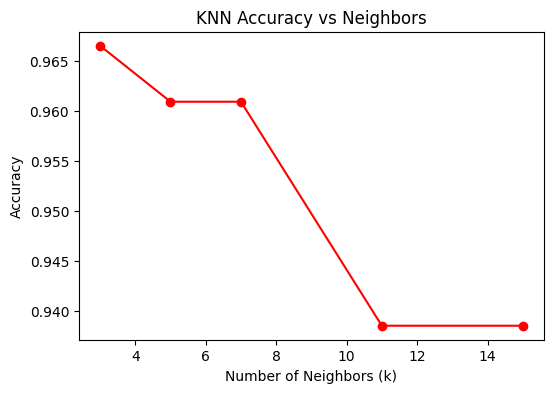

KNN accuracies for different k values: {3: 0.9664804469273743, 5: 0.9608938547486033, 7: 0.9608938547486033, 11: 0.9385474860335196, 15: 0.9385474860335196}


In [14]:
# --- Bonus 3: Tune KNN neighbors ---
knn_scores = {}

for k in [3, 5, 7, 11, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    knn_scores[k] = acc

# Plot results
plt.figure(figsize=(6,4))
plt.plot(list(knn_scores.keys()), list(knn_scores.values()), marker="o", color="red")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs Neighbors")
plt.show()

print("KNN accuracies for different k values:", knn_scores)


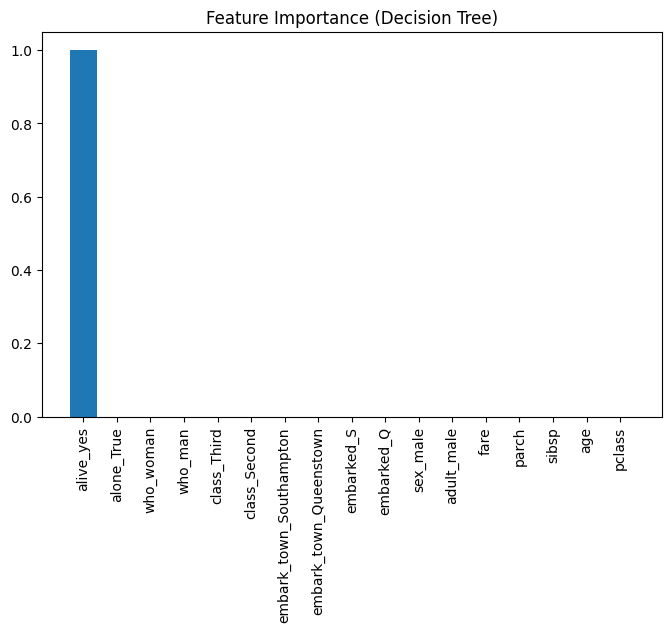

In [13]:
# --- Bonus 2: Feature Importance from Decision Tree ---
import numpy as np

# Get feature importances
importances = decision_tree.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Feature Importance (Decision Tree)")
plt.show()


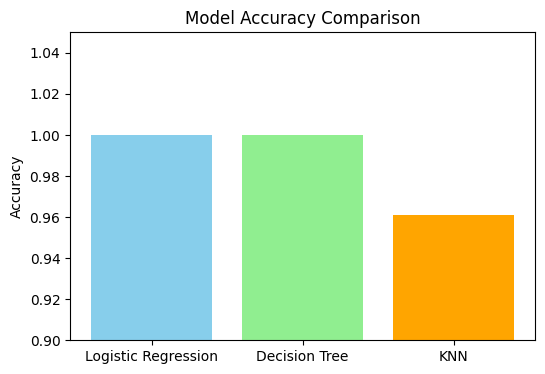

In [12]:
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values(), color=["skyblue", "lightgreen", "orange"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.05)  # zoom in to see small differences
plt.show()


In [3]:
import matplotlib.pyplot as plt


Logistic Regression Results
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



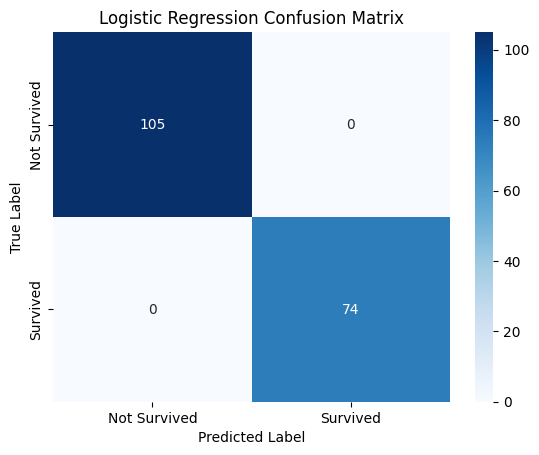


Decision Tree Results
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



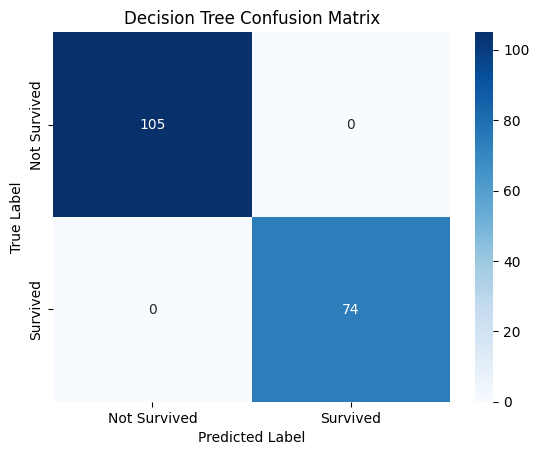


KNN Results
Accuracy: 0.9608938547486033
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       105
           1       0.92      0.99      0.95        74

    accuracy                           0.96       179
   macro avg       0.96      0.96      0.96       179
weighted avg       0.96      0.96      0.96       179



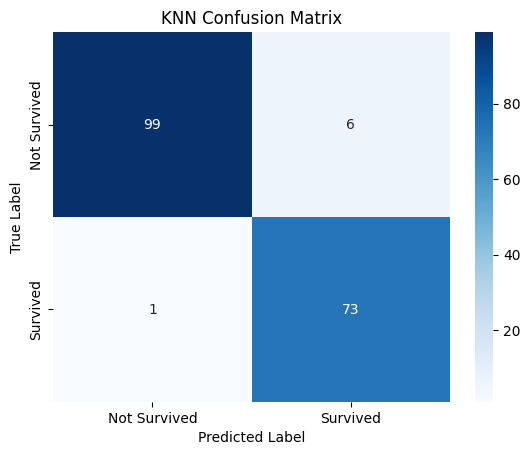


Model Comparison (Accuracy):
Logistic Regression: 1.0000
Decision Tree: 1.0000
KNN: 0.9609


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 7: Train multiple models ---

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree,
    "KNN": knn
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    # Predict
    y_pred = model.predict(X_test_scaled)
    # Evaluate accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n{name} Results")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# Compare accuracies
print("\nModel Comparison (Accuracy):")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Step 6: Feature Scaling ---

# Separate features (X) and target (y)
X = titanic_encoded.drop(columns=["survived"])  # Features
y = titanic_encoded["survived"]                 # Target

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show shape of datasets
print("Training set shape:", X_train_scaled.shape)
print("Testing set shape:", X_test_scaled.shape)


Training set shape: (712, 17)
Testing set shape: (179, 17)


In [9]:
# --- Step 4: Encode categorical variables ---

# Use one-hot encoding (convert categories to numbers)
titanic_encoded = pd.get_dummies(
    titanic,
    columns=["sex", "embarked", "embark_town", "class", "who", "alive", "alone"],
    drop_first=True  # avoids dummy variable trap (removes redundant column)
)
# Convert any boolean columns to integers (0/1)
titanic_encoded = titanic_encoded.astype(int)

# Show first 5 rows after encoding
titanic_encoded.head()


,survived,pclass,age,sibsp,parch,fare,adult_male,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,who_man,who_woman,alive_yes,alone_True
0,0,3,22,1,0,7,1,1,0,1,0,1,0,1,1,0,0,0
1,1,1,38,1,0,71,0,0,0,0,0,0,0,0,0,1,1,0
2,1,3,26,0,0,7,0,0,0,1,0,1,0,1,0,1,1,1
3,1,1,35,1,0,53,0,0,0,1,0,1,0,0,0,1,1,0
4,0,3,35,0,0,8,1,1,0,1,0,1,0,1,1,0,0,1


In [8]:

if "deck" in titanic.columns:
    titanic = titanic.drop(columns=["deck"])


titanic["age"] = titanic["age"].fillna(titanic["age"].median())
titanic["embarked"] = titanic["embarked"].fillna(titanic["embarked"].mode()[0])
titanic["embark_town"] = titanic["embark_town"].fillna(titanic["embark_town"].mode()[0])

# Double-check missing values again
print(titanic.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [7]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")

# Show the first 5 rows
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Run this once to make sure the required libraries are installed in your environment
!pip install numpy pandas matplotlib seaborn scikit-learn joblib



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\DELL\Documents\AI\HousePricePrediction\.venv\Scripts\python.exe -m pip install --upgrade pip
